In [5]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

In [6]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day14/sales-of-shampoo-over-a-three-ye.csv")
df

,Month,Sales_of_shampoo
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3
5,2001-06-01,168.5
6,2001-07-01,231.8
7,2001-08-01,224.5
8,2001-09-01,192.8
9,2001-10-01,122.9


In [50]:
# Additive Seasonal HW with parameters
y_train = df['Sales_of_shampoo'][:-12]
y_test = df['Sales_of_shampoo'][-12:]
alpha, beta, gamma = 0.25, 0.25, 0.01
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add', use_boxcox = 0.5)

#without smoothing parameters
fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

#with auto tuning
#fit1 = hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

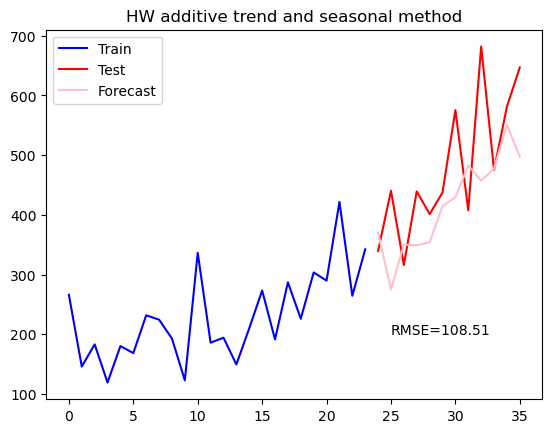

In [51]:
#plotting additve and seasonal method
y_train.plot(color='blue', label='Train')
y_test.plot(color='red', label='Test')
fcast1.plot(color='pink', label='Forecast')
error = round(np.sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(25, 200, "RMSE="+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc='best')
plt.show()

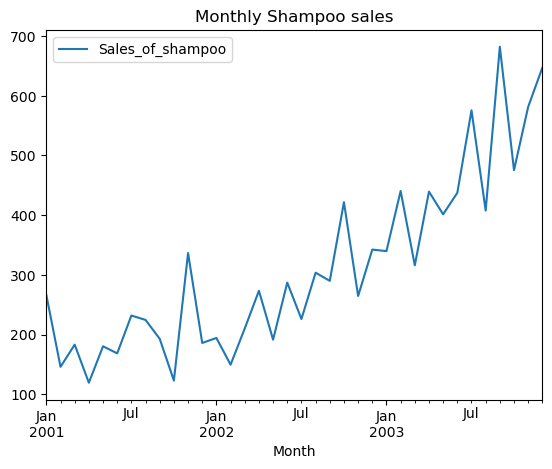

In [60]:
#change the time series to quarterly
shamp = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day14/sales-of-shampoo-over-a-three-ye.csv", index_col=0)
shamp.index = pd.to_datetime(shamp.index).to_period("M")

shamp.plot()
plt.title("Monthly Shampoo sales")
plt.show()

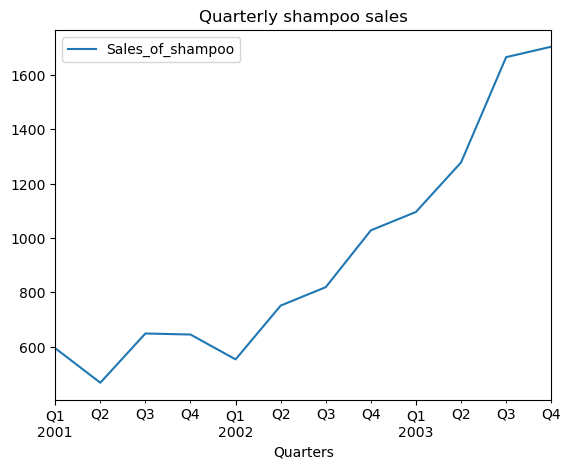

In [58]:
shamp_qtr = shamp.resample('Q').sum()
shamp_qtr.index.rename('Quarter', inplace=True)
shamp_qtr.plot()
plt.title("Quarterly shampoo sales")
plt.xlabel('Quarters')
plt.show()

In [109]:
y = shamp_qtr['Sales_of_shampoo']
y_train = y[:-3]
y_test = y[-3:]


alpha= 0.3
beta = 2

#linear
ses = Holt(y_test)
fit1 = ses.fit(smoothing_level = alpha, smoothing_trend = beta)
fcast1 = fit1.forecast(len(y_test))

C:\ProgramData\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


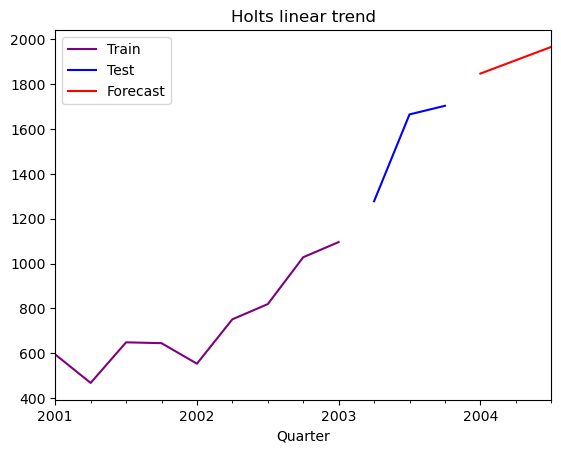

In [110]:
#plot
y_train.plot(color='purple', label='Train')
y_test.plot(color='blue', label='Test')
fcast1.plot(color='red', label='Forecast')
plt.title("Holts linear trend")
plt.legend(loc='best')
plt.show()

In [111]:
print("RMSE= ", np.sqrt(mean_squared_error(y_test, fcast1)))

RMSE=  387.78916548827084


In [114]:
# Additive Seasonal HW with parameters
y_train = df['Sales_of_shampoo'][:-12]
y_test = df['Sales_of_shampoo'][-12:]
alpha, beta, gamma = 0.5, 0.02, 0.15
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')

#without smoothing parameters
fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

#with auto tuning
#fit1 = hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

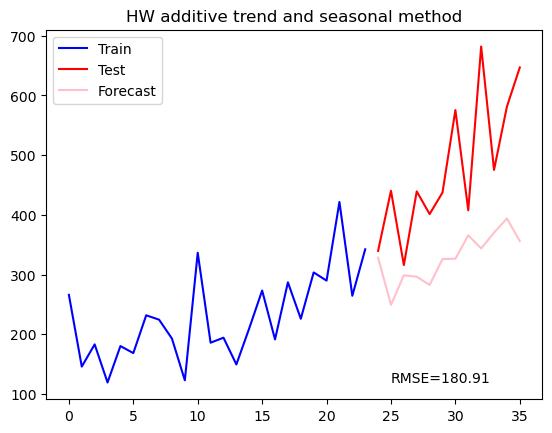

In [120]:
#plotting additve and seasonal method
y_train.plot(color='blue', label='Train')
y_test.plot(color='red', label='Test')
fcast1.plot(color='pink', label='Forecast')
error = round(np.sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(25, 120, "RMSE="+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc='best')
plt.show()